# Audio classification for Quranic verses 

## Data collection
Audio data was collected from [Al Quran's](https://alquran.cloud/) CDN. Each verse has 26 audio samples, each sample either from a different reciter or from the same reciter with a different style.

Take a look at the collection scripts [here](#)

## Exploratory data analysis (EDA)
Comparing waveplots of different recitations of the same verse shows that they can look completely different.

The length of the verses of the Quran vary greatly. Moreover, the style of the reciter can be fast or slow, or deliberately meticulous (Mujawwad style), which adds more variability to the samples.

We can add a dummy padding to the audio samples to make them the same length as the longest audio sample (of any recitation of any verse).

This modification should not affect the accuracy of the model, because more variability means more samples will be padded, and this will almost be an invariant feature of the samples. So if the model is good, it will ignore the padding as a relevant feature in the classification task.

In [56]:
import os
from pathlib import Path
import librosa

import numpy as np
import matplotlib.pyplot as plt
import pandas

import torch
import torchaudio
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
from torchinfo import summary

RANDOM_SEED = 42

In [46]:
def plot_waveform(data, sample_rate, title):    
    plt.figure(figsize=(12, 4))
    plt.title(title)
    librosa.display.waveshow(data, sr=sample_rate)

def plot_stft(data, sample_rate, title: str):
    D = librosa.stft(data)
    Ddb = librosa.amplitude_to_db(abs(D))
    plt.figure(figsize=(12, 4))
    plt.title(title)
    librosa.display.specshow(Ddb, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.colorbar()

In [62]:
from IPython import display

# Comparing the same verse by two different reciters
# Second verse of Al-Fatihah
c1_v2_murattal = r'C:\Users\haadb\OneDrive\Desktop\quran-verse-recognition\data\1\2\1_2_abdulbasitmurattal.mp3'
c1_v2_sudais = r'C:\Users\haadb\OneDrive\Desktop\quran-verse-recognition\data\1\2\1_2_abdurrahmaansudais.mp3'

d12m, sr12m = librosa.load(c1_v2_murattal)
d12s, sr12s = librosa.load(c1_v2_sudais)

c2_v9_murattal = r'C:\Users\haadb\OneDrive\Desktop\quran-verse-recognition\data\2\9\2_9_abdulbasitmurattal.mp3'
c2_v9_sudais = r'C:\Users\haadb\OneDrive\Desktop\quran-verse-recognition\data\2\9\2_9_abdurrahmaansudais.mp3'

d29m, sr29m = librosa.load(c2_v9_murattal)
d29s, sr29s = librosa.load(c2_v9_sudais)

In [63]:
display.Audio(data=d12m, rate=sr12m) # murattal, (1:2)

In [68]:
display.Audio(data=d12s, rate=sr12s) # sudais, (1:2)

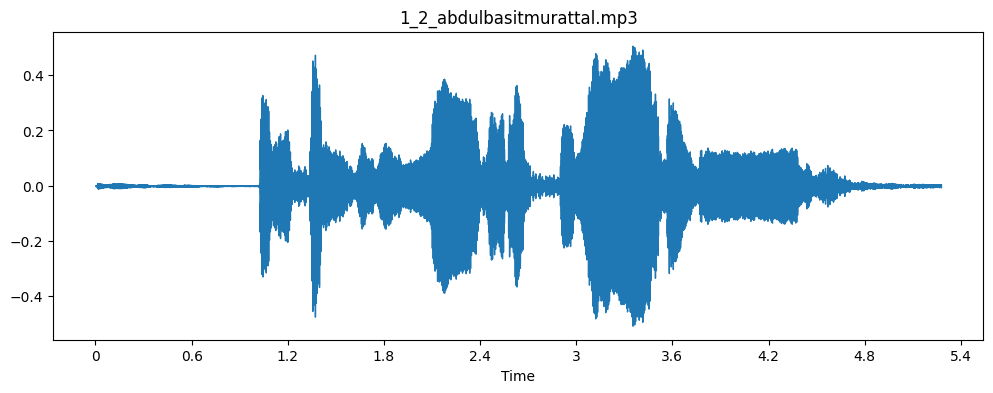

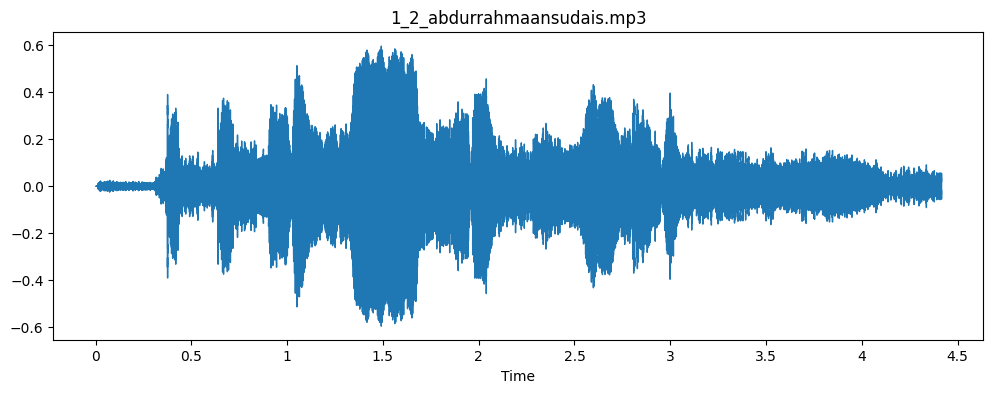

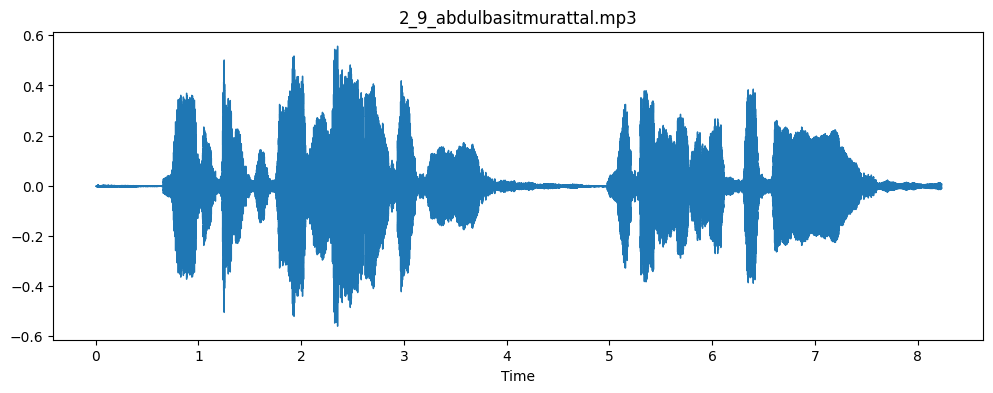

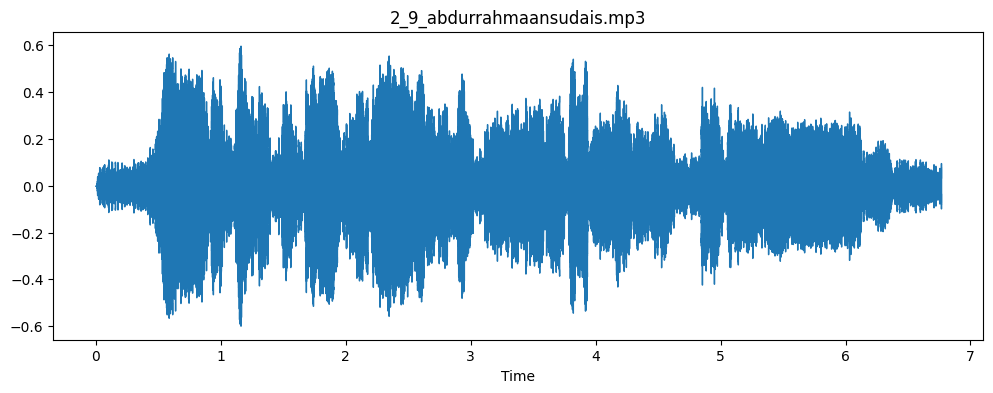

In [65]:
# Waveforms of audio samples
plot_waveform(d12m, sr12m, '1_2_abdulbasitmurattal.mp3')
plot_waveform(d12s, sr12s, '1_2_abdurrahmaansudais.mp3')
plot_waveform(d29m, sr29m, '2_9_abdulbasitmurattal.mp3')
plot_waveform(d29s, sr29s, '2_9_abdurrahmaansudais.mp3')

The waveforms capture the loudness of the audio sample, but this is not enough to distinguish the verses. Emphatic styles may be louder than more mellow styles for the same verse, for example. This is why we need the spectrograms, which encode the frequencies (in Hz) over time of the audio sample. Unique verses are likely to have unique frequencies in a given time range, so the spectrograms are vital in allowing our models to distinguish verses.

Different reciters have different pitches to their voice. They have different vocal ranges. So when comparing the spectrograms, we should normalize the vocal ranges.

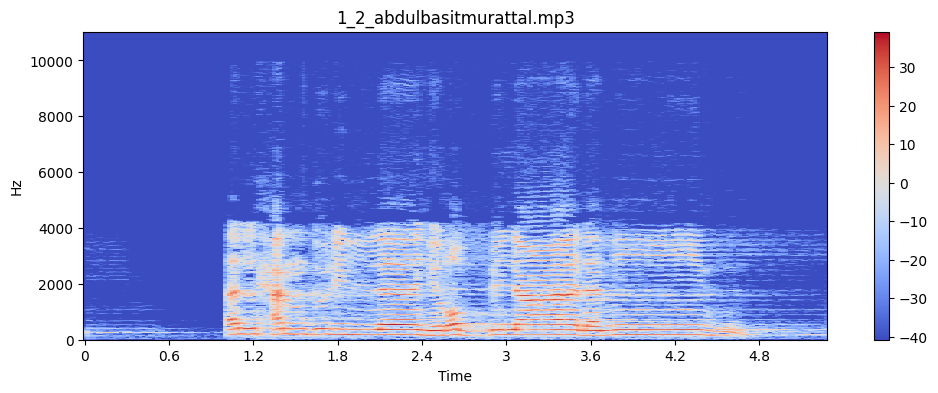

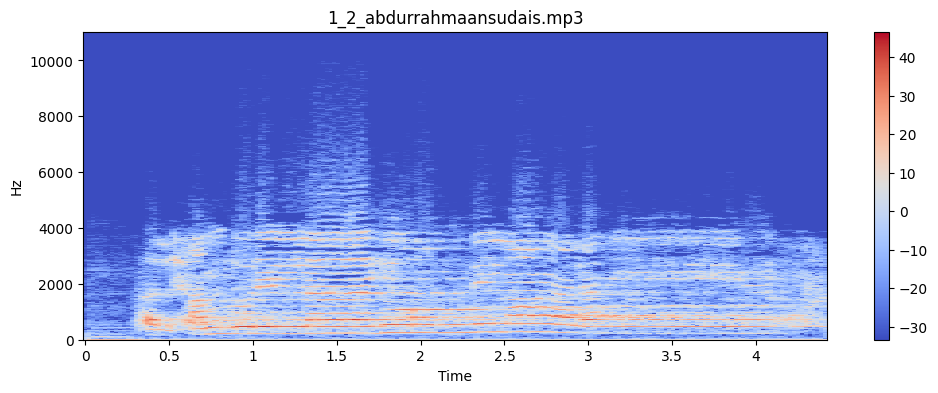

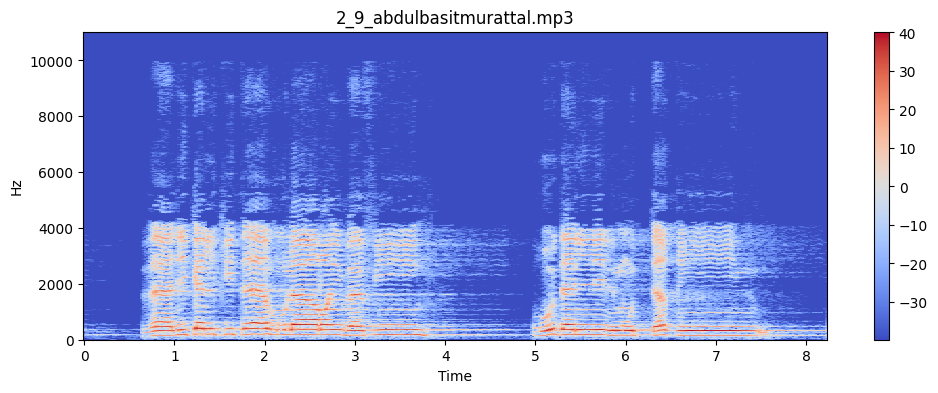

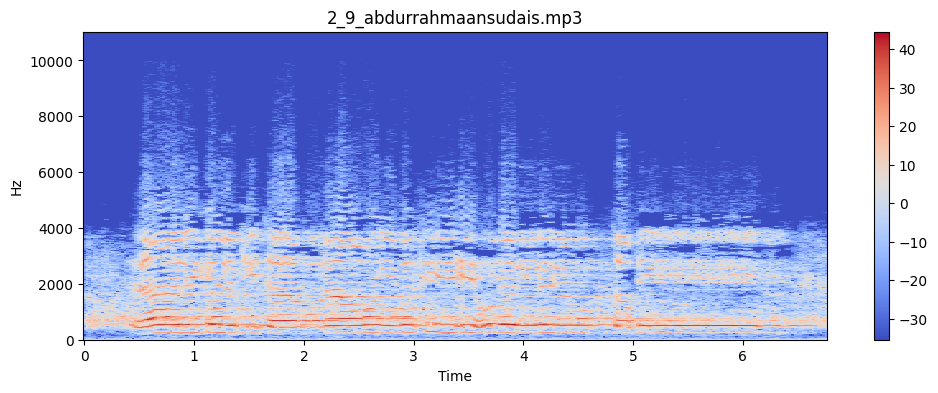

In [66]:
# Melspectrograms of audio samples to visualize frequencies over recording:
plot_stft(d12m, sr12m, '1_2_abdulbasitmurattal.mp3')
plot_stft(d12s, sr12s, '1_2_abdurrahmaansudais.mp3')
plot_stft(d29m, sr29m, '2_9_abdulbasitmurattal.mp3')
plot_stft(d29s, sr29s, '2_9_abdurrahmaansudais.mp3')


It is difficult for a human to notice the similarities between the spectrograms of the two recitations of (1:2) and the two recitations of (2:9), which motivates this audio classification task.

In [ ]:
# Shard validation into test and validation
test_ds = val_ds.shard(num_shards=2, index=0)
val_ds = val_ds.shard(num_shards=2, index=1)

In [ ]:
INPUT_SHAPE = -1 
EPOCHS = = -1
N_LABELS = 

model = keras.Sequential([
    layers.InputLayer(input_shape=INPUT_SHAPE),
    layers.Normalization(),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(N_LABELS)
])